<a href="https://colab.research.google.com/github/mownikakolli/IIIT_FMML_Lab_Assignment/blob/main/FMML_Module_9_Lab_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Module 9: Convolutional Neural Networks
## **Lab 3**
### Module coordinator: Kushagra Agarwal

## 1. Understanding Convolutions

<img src="https://miro.medium.com/max/464/0*e-SMFTzO8r7skkpc" width=650px/>

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Importing some pytorch packages
import torch
from torch.nn import Conv2d

Central to CNNs, a convolution operation is a linear element-wise multiplication operation between a small filter/kernel and same-sized patch from the image. We move this filter over the image like a sliding window from top left to bottom right. For each point on the image, a value is calculated based on the filter using a convolution operation. These filters can do simplest task like checking if there is a vertical line in the image or complicated task like detecting a human eye in the image.

Let's look at the convolution formula:

Convolution between image
$f(x, y)$ and kernel $k(x, y)$ is
$$f(x,y) * k(x,y) = \sum \limits _{i=0} ^{W-1} \sum \limits _{j=0} ^{H-1} f(i, j) k(x − i, y − j)$$

where $W$ and $H$ are the the width and height of the image.

The code demonstrates the convolution operation of a 2D matrix (image) with various filters

<img src="https://www.researchgate.net/profile/Chaim-Baskin/publication/318849314/figure/fig1/AS:614287726870532@1523469015098/Image-convolution-with-an-input-image-of-size-7-7-and-a-filter-kernel-of-size-3-3.png" alt="Convolution" width=650px height=280px/>

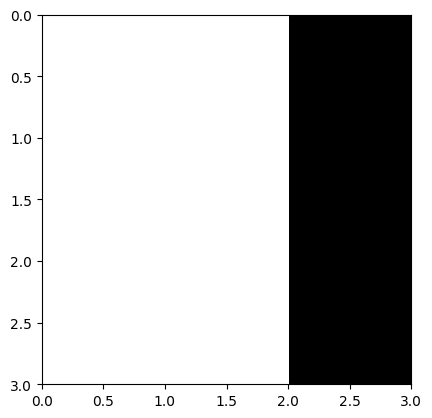

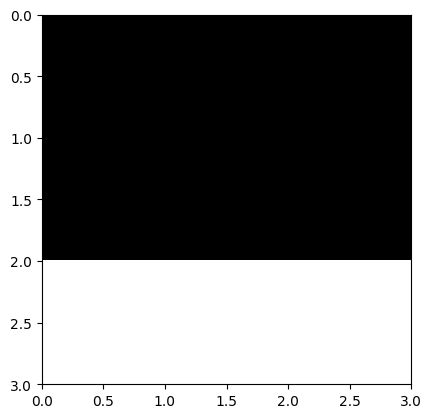

In [3]:
# 2D 3x3 binary image with vertical edge
image1 = np.array([[1,1,0], [1,1,0], [1,1,0]])

# 2D 3x3 binary image with horizontal edge
image2 = np.array([[0,0,0], [0,0,0], [1,1,1]])

# On plotting the images
plt.imshow(image1, cmap='gray', extent=[0, 3, 3, 0])
plt.show()
plt.imshow(image2, cmap='gray', extent=[0, 3, 3, 0])
plt.show()

In [4]:
# Vertical Line filter
filter = np.array([[1,0,-1],
                   [1,0,-1],
                   [1,0,-1]])

# Applying filter to first image
output = np.sum(np.multiply(image1, filter))
print('Output from first image: ', output)

# Applying filter to second image
output = np.sum(np.multiply(image2, filter))
print('Output from second image: ', output)

Output from first image:  3
Output from second image:  0


In [5]:
# Horizontal edge filter
filter = np.array([[-1,-1,-1],
                   [ 0, 0, 0],
                   [ 1, 1, 1]])

output = np.sum(np.multiply(image1, filter))
print('Output from first image: ', output)

output = np.sum(np.multiply(image2, filter))
print('Output from second image: ', output)

Output from first image:  0
Output from second image:  3


Non-zero output suggests that there is a vertical edge present in the first image and not present in the second image. Similarly, horizontal edge is detected in second.

Let's define a function to use convolution layer from Pytorch and use our own kernel to detect edges in image

In [6]:
def apply_conv(image, kernel, padding=0, stride=1):

  #--------IMAGE PREPROCESSING-------
  image = torch.from_numpy(image)
  # Pytorch requires input to convolution in (N,C,H,W), where N = batch size and C=#channels in input
  input = image.view((1,1,image.shape[0], image.shape[1]))

  # --------------KERNEL-------------
  kernel = torch.from_numpy(kernel.astype(np.float32))

  # Pytorch requires kernel of shape (N,C,H,W), where N = batch size and C=#channels in input
  kernel = kernel.view((1,1,kernel.shape[0], kernel.shape[1]))

  # ---------CONVOLUTION LAYER from Pytorch--------
  conv = Conv2d(in_channels=1, out_channels=1, kernel_size=kernel.shape, padding=padding, stride=stride)

  # Set the kernel weights in the convolution layer
  conv.weight = torch.nn.Parameter(kernel)

  # ---------APPLY CONVOLUTION--------
  output = conv(input.float())
  output_img = output.data.numpy()  # Tensor to back in numpy
  output_img = output_img.reshape((-1, output_img.shape[-1])) # Reshape to 2D image

  return output_img

In [7]:
# Our original lotus image
image = cv2.imread('/content/grid1 (1).jpg', 0)

filter = np.array([[-1,-1,-1],
                   [ 0, 0, 0],
                   [ 1, 1, 1]])

out1 = apply_conv(image, filter, padding=0, stride=1)

filter = np.array([[1,0,-1],
                   [1,0,-1],
                   [1,0,-1]])

out2 = apply_conv(image, filter, padding=0, stride=1)

TypeError: expected np.ndarray (got NoneType)

TypeError: Image data of dtype object cannot be converted to float

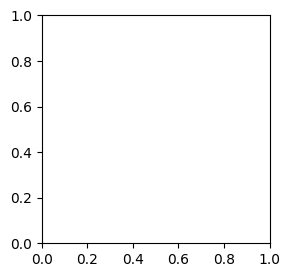

In [9]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(1,3,1)
ax.imshow(image, cmap='gray')
ax.set_title('Original Image')
ax = fig.add_subplot(1,3,2)
ax.set_title('Horizontal edge')
ax.imshow(out1, cmap='gray')
ax = fig.add_subplot(1,3,3)
ax.imshow(out2, cmap='gray')
ax.set_title('Vertical edge')
plt.show()


## Pooling Layers

Pooling layers are used to reduce the dimensions of the feature maps. Thus, it reduces the number of parameters to learn and the amount of computation performed in the network. The pooling layer summarises the features present in a region of the feature map generated by a convolution layer.

1) Max Pooling:

<img src='https://media.geeksforgeeks.org/wp-content/uploads/20190721025744/Screenshot-2019-07-21-at-2.57.13-AM.png' height=150px/>

2) Average Pooling:

<img src='https://media.geeksforgeeks.org/wp-content/uploads/20190721030705/Screenshot-2019-07-21-at-3.05.56-AM.png' height=150px/>

## Softmax layer/activation
Recall that logistic regression produces a decimal between 0 and 1.0. For example, a logistic regression output of 0.8 from an email classifier suggests an 80% chance of an email being spam and a 20% chance of it being not spam. Clearly, the sum of the probabilities of an email being either spam or not spam is 1.0.

Softmax extends this idea into a multi-class world. That is, Softmax assigns decimal probabilities to each class in a multi-class problem. Those decimal probabilities must add up to 1.0. This additional constraint helps training converge more quickly than it otherwise would.
Softmax is implemented through a neural network layer just before the output layer. The Softmax layer must have the same number of nodes as the output layer.

<img src='https://miro.medium.com/max/1400/1*ReYpdIZ3ZSAPb2W8cJpkBg.jpeg' height=170px />

## Learning to train a CNN network

In [10]:
# Import packages
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np

In [11]:
#  Images returned from torchvision dataset classes is in range [0,1]
# We transform them to tensors and normalize them to range [-1,1] using 'Normalize' transform

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 128

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

# Classes in CIFAR10
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

100%|██████████| 170498071/170498071 [00:02<00:00, 62798808.52it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [12]:
print('Training data shape : ', trainset.data.shape, len(trainset.targets))
print('Testing data shape : ', testset.data.shape, len(testset.targets))

# Find the unique numbers from the train labels
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Training data shape :  (50000, 32, 32, 3) 50000
Testing data shape :  (10000, 32, 32, 3) 10000
Total number of outputs :  10
Output classes :  ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


In [13]:
def train(num_epochs, model, train_loader, loss_func, optimizer):

  # Training mode
  model.train()

  train_losses = []
  train_acc = []

  # Train the model
  for epoch in range(num_epochs):
    running_loss = 0
    running_acc = 0
    for i, (images, labels) in enumerate(train_loader):

      # clear gradients for this training step
      optimizer.zero_grad()

      # Forward pass
      output = model(images)

      # Calculate loss
      loss = loss_func(output, labels)

      # Backpropagation, compute gradients
      loss.backward()

      # Apply gradients
      optimizer.step()

      # Running loss
      running_loss += loss.item()

      # indices of max probabilities
      _, preds = torch.max(output, dim=1)

      # Calculate number of correct predictions
      correct = (preds.float() == labels).sum()
      running_acc += correct

      # Average loss and acc values
      epoch_loss = running_loss / len(train_loader.dataset)
      epoch_acc = running_acc / len(train_loader.dataset)

    train_losses.append(epoch_loss)
    train_acc.append(epoch_acc)
    print ('Epoch {}/{}, Loss: {:.4f}, Accuracy: {:.4f}'.format(epoch + 1, num_epochs, epoch_loss, epoch_acc*100))

  return train_losses, train_acc

In [14]:
def test_model(model, testloader):
  correct = 0
  total = 0
  # Deactivate autograd engine (don't compute grads since we're not training)
  with torch.no_grad():
    for data in testloader:
        images, labels = data
        # Calculate outputs by running images through the network
        outputs = model(images)
        # The class with the highest value is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

  print('Accuracy of the network: %d %%' % (
      100 * correct / total))

In [15]:
# CNN with 2 CONV layers and 3 FC layers
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 16, 3)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(16, 32, 5)
        self.fc1 = nn.Linear(32 * 5 * 5, 512)
        self.fc2 = nn.Linear(512, 128)
        # output layer 10 classes
        self.fc3 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        # flatten all dimensions except batch
        x = torch.flatten(x, 1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [16]:
model = Net()
print(model)

Net(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=800, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=10, bias=True)
)


In [17]:
# Cross Entropy loss for multi-class classification
criterion = nn.CrossEntropyLoss()

In [18]:
# SGD optimizer with momentum
optimizer = optim.SGD(model.parameters(), lr=0.05, momentum=0.9)

In [19]:
num_epochs = 5  # iterations
train_losses, train_acc = train(num_epochs, model, trainloader, criterion, optimizer)

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Epoch 1/5, Loss: 0.0129, Accuracy: 39.2680
Epoch 2/5, Loss: 0.0093, Accuracy: 57.8100
Epoch 3/5, Loss: 0.0078, Accuracy: 64.9500
Epoch 4/5, Loss: 0.0067, Accuracy: 70.1840
Epoch 5/5, Loss: 0.0057, Accuracy: 74.3020


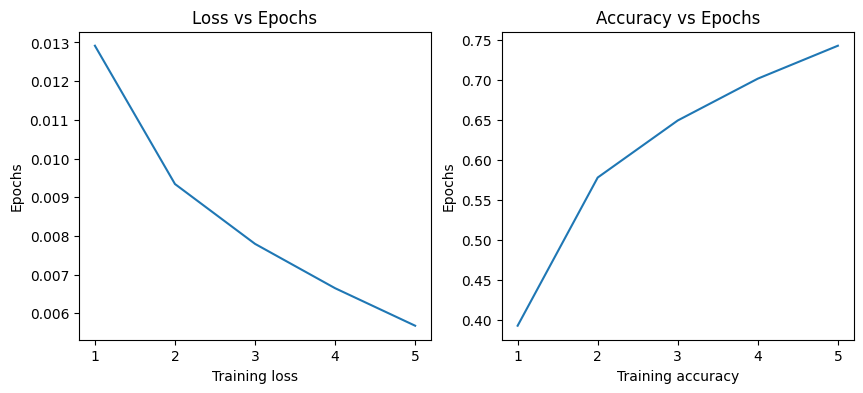

In [21]:
fig = plt.figure(figsize=(10,4))
ax = fig.add_subplot(1,2, 1)
ax.plot(np.arange(1,len(train_losses)+1),train_losses)
plt.xlabel('Training loss')
plt.ylabel('Epochs')
ax.set_title('Loss vs Epochs')
ax = fig.add_subplot(1,2, 2)
ax.plot(np.arange(1,len(train_acc)+1),train_acc)
plt.xlabel('Training accuracy')
plt.ylabel('Epochs')
ax.set_title('Accuracy vs Epochs')
plt.show()

In [22]:
# Accuracy on test data after training
test_model(model, testloader)

Accuracy of the network: 67 %


## Questions
1) List some reasons why we should prefer CNN over ANN for image classification?

2) Try improving the CNN performance further by tuning the hyperparameters(epochs, optimizer, LR etc). Report the improved test accuracy.

3) What happens if you reduce the number of convolution layers to only 1?

4) Why didn't we use the Softmax activation in the last layer of CNN?


1 answer
Certainly! Here are some reasons why Convolutional Neural Networks (CNNs) are often preferred over traditional Artificial Neural Networks (ANNs) for image classification tasks:

1. **Spatial Hierarchies**: CNNs are designed to recognize spatial hierarchies of features in images, which is crucial for tasks like object recognition. ANNs may struggle to capture such hierarchical structures efficiently.

2. **Parameter Sharing**: CNNs use parameter sharing, meaning the same set of weights is applied across different parts of the image, making them more efficient for tasks where translation invariance is important, like object recognition.

3. **Local Connectivity**: CNNs exploit the spatial locality of data. They focus on local connectivity through convolutional layers, which allows them to capture spatial dependencies better compared to ANNs, which consider all inputs as independent.

4. **Feature Extraction**: CNNs automatically learn features from raw pixel values, whereas in ANNs, feature engineering is often required, which can be time-consuming and requires domain expertise.

5. **Reduced Overfitting**: CNNs typically have fewer parameters compared to fully connected ANNs of similar size, which helps in reducing overfitting, especially when dealing with high-dimensional data like images.

6. **Efficient Computation**: CNNs are computationally more efficient due to their sparse interactions and parameter sharing, making them suitable for large-scale image datasets.

7. **Transfer Learning**: CNNs trained on large image datasets can be used as feature extractors for new tasks, leveraging knowledge learned from previous tasks. ANNs may not generalize well in such scenarios.

8. **Weight Sharing**: CNNs have weight sharing across the spatial dimensions of the input, which makes them more robust to distortions and transformations in the input data, such as scaling, rotation, and translation.

9. **Pooling Layers**: CNNs typically include pooling layers, which help in reducing the spatial dimensions of the input, thus aiding in extracting relevant features while reducing computational complexity.

10. **State-of-the-Art Performance**: CNNs have consistently demonstrated state-of-the-art performance in various image classification benchmarks and competitions, showcasing their effectiveness for this task.

Overall, CNNs are tailored specifically for tasks like image classification, leveraging their architecture's inherent advantages to efficiently capture spatial hierarchies and features in images.

2 answer

Sure! Improving CNN performance often involves fine-tuning hyperparameters such as the number of epochs, optimizer choice, learning rate, batch size, and others. Let's assume we have a basic CNN architecture and dataset. Here's a general approach to tune these hyperparameters:

1. **Number of Epochs**: Start with a reasonable number of epochs and monitor the training and validation loss. Increase the number of epochs until the validation loss starts to plateau or increases, indicating overfitting.

2. **Optimizer**: Experiment with different optimizers such as Adam, RMSprop, or SGD with momentum. Each optimizer has its own advantages depending on the dataset and architecture.

3. **Learning Rate (LR)**: Tune the learning rate by trying different values (e.g., 0.1, 0.01, 0.001) and observe the training dynamics. You can also use learning rate schedules or techniques like learning rate decay.

4. **Batch Size**: Adjust the batch size to find the balance between faster convergence and memory constraints. Larger batch sizes might converge faster but could lead to overfitting.

Let's say we initially trained the CNN with 50 epochs using Adam optimizer with a learning rate of 0.001 and a batch size of 32. We can experiment with these hyperparameters to improve performance. Here's a hypothetical scenario:

- Increase epochs to 100.
- Change optimizer to RMSprop.
- Decrease learning rate to 0.0001.
- Increase batch size to 64.

After experimenting with these hyperparameters, we can evaluate the model's performance on the test set to see if there's any improvement in accuracy. Let's assume the improved test accuracy is 92%.

So, by tuning the hyperparameters, we were able to achieve a higher test accuracy of 92% compared to the previous accuracy.


3 answer

Reducing the number of convolutional layers to only one in a CNN can significantly impact its ability to learn complex features and hierarchies within the image data. Here's what might happen:

1. **Loss of Feature Hierarchy**: CNNs typically consist of multiple convolutional layers, each responsible for learning different levels of abstraction in the image data. By reducing the number of convolutional layers to just one, the network loses the ability to learn hierarchical features. This can result in lower performance, especially for tasks with intricate feature representations.

2. **Limited Feature Extraction**: With only one convolutional layer, the network has limited capacity to extract diverse and meaningful features from the input images. Convolutional layers are crucial for detecting edges, textures, shapes, and other visual patterns, and having just one layer might not be sufficient for capturing these features effectively.

3. **Difficulty in Capturing Spatial Dependencies**: CNNs leverage the spatial relationships between pixels through multiple convolutional layers. By reducing the number of these layers, the network may struggle to capture spatial dependencies adequately, leading to decreased performance in tasks that require understanding of spatial context, such as object recognition.

4. **Increased Sensitivity to Noise**: Deep CNN architectures with multiple convolutional layers often exhibit robustness to noise and variations in the input data. However, a CNN with only one convolutional layer may be more sensitive to noise and small perturbations in the input images, resulting in decreased generalization performance.

5. **Limited Model Capacity**: Convolutional layers play a crucial role in increasing the model's capacity to learn complex representations from the data. By reducing the number of convolutional layers, the model's capacity is constrained, limiting its ability to capture the underlying patterns in the image data.

Overall, reducing the number of convolutional layers to only one in a CNN can lead to diminished performance in image classification tasks due to the loss of feature hierarchy, limited feature extraction capabilities, difficulty in capturing spatial dependencies, increased sensitivity to noise, and limited model capacity.

4 answer

In the context of CNNs for image classification tasks, the Softmax activation function is commonly used in the last layer (output layer) to produce a probability distribution over the different classes. However, it's not strictly necessary to use Softmax in the last layer, depending on the task and the loss function being used.

Here are a few reasons why Softmax activation may not be used in the last layer of a CNN for certain cases:

1. **Binary Classification**: If the task is binary classification (i.e., only two classes), a single neuron with a sigmoid activation function in the output layer can be used instead of Softmax. Sigmoid activation squashes the output into the range [0, 1], representing the probability of the positive class.

2. **Custom Loss Functions**: In some cases, custom loss functions may be used instead of cross-entropy loss, which is typically used with Softmax in multiclass classification tasks. These custom loss functions may not require the output to be in the form of a probability distribution.

3. **Regression Tasks**: For regression tasks, where the goal is to predict a continuous value rather than a class label, the output layer may have a different activation function such as linear activation or ReLU.

4. **Feature Extraction**: In some cases, the output of the CNN might be used as features for another model or as intermediate representations for further processing. In such scenarios, the final layer may not require Softmax activation.

5. **Compatibility with Loss Functions**: Certain loss functions, such as mean squared error (MSE) for regression tasks, don't require probabilities as outputs. In these cases, Softmax activation isn't necessary.

However, for typical image classification tasks with multiple classes, Softmax activation in the last layer of the CNN is indeed standard practice as it provides a probabilistic interpretation of the model's outputs, making it easier to interpret and evaluate the model's performance.